<div>
<img src = "netflix-logo.png" width = "500"/>
</div>

# Introduction
**Netflix is not a name unfamiliar to most people. Here are some key statistics why I am enthusaistic about analyzing Netflix.**
- 04 million Netflix streaming subscribers as of Q4 2020 *(Netflix)*
- Netflix users by region in Q4 2020: 74 million US & Canada; 67 million EMEA; 38 million Latin America; 25 million Asia Pacific *(Netflix)*
- Netflix accounts for 34% of US streaming/8.5% of overall viewing *(Nielsen)*
- Netflix US library contains 3,600 movies and 1,800 shows as of February 2021 *(JustWatch)*
- Extraction most viewed Netflix Originals film as of January 2021, with 99 million views in first month *(Netflix via  What’s on Netflix)*
- The Office most streamed Netflix (and overall) series in the US over 2020, with a total of 57.1 billion minutes *(Nielsen)*
- Total Netflix 2020 revenue came to 25 billion, up from 20 billion in 2019 *(Netflix)*

In [2]:
#Importing data and required libraries
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
os.chdir("/Users/ayonikabose/Documents/GitHub/analysis_of_netflix_titles")
data = pd.read_csv("netflix_titles.csv")
df = pd.DataFrame(data, index = None)
data.sample(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
214,s215,Movie,A Perfect Ending,Nicole Conn,"Barbara Niven, Jessica Clark, John Heard, Morg...",United States,"January 1, 2019",2012,TV-MA,110 min,"Dramas, Independent Movies, LGBTQ Movies","After confessing an unusual secret, a represse..."
6418,s6419,TV Show,The Great British Baking Show: The Beginnings,NaN,"Paul Hollywood, Mary Berry, Mel Giedroyc, Sue ...",NaN,"November 1, 2018",2012,TV-PG,1 Season,"British TV Shows, Reality TV",A dozen amateur bakers amiably compete for the...
4433,s4434,TV Show,Nature's Great Race,NaN,Liz Bonnin,United Kingdom,"October 1, 2017",2016,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",Epic footage captures three of the world's mos...
240,s241,Movie,A Thousand Words,Brian Robbins,"Eddie Murphy, Kerry Washington, Cliff Curtis, ...",United States,"July 1, 2020",2012,PG-13,92 min,Comedies,When he learns his karma will permit him to sp...
2621,s2622,Movie,Hard Kill,Matt Eskandari,"Jesse Metcalfe, Bruce Willis, Natalie Eva Mari...",United States,"November 23, 2020",2020,R,98 min,Action & Adventure,When a billionaire hires a team of mercenaries...


To get an idea, here are 5 random rows from the data! Can't wait to gain some insights *muscle emoji here please!*

## Analysis of data!

In [3]:
rows = len(df.axes[0])
cols = len(df.axes[1])

print("There are " + str(rows) + " rows and " + str(cols) + " columns in the data")

There are 7787 rows and 12 columns in the data


In [4]:
#Let's clean some of the data! 
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
#Using this code helps us remove all the NA values that was present in the data. We dropped almost 3000 rows phew! 
data = df.dropna()
rows = len(data.axes[0])
cols = len(data.axes[1])
print("There are now " + str(rows) + " rows and " + str(cols) + " columns in the data!")


There are now 4808 rows and 12 columns in the data!


Text(0, 0.5, 'Number Of Releases')

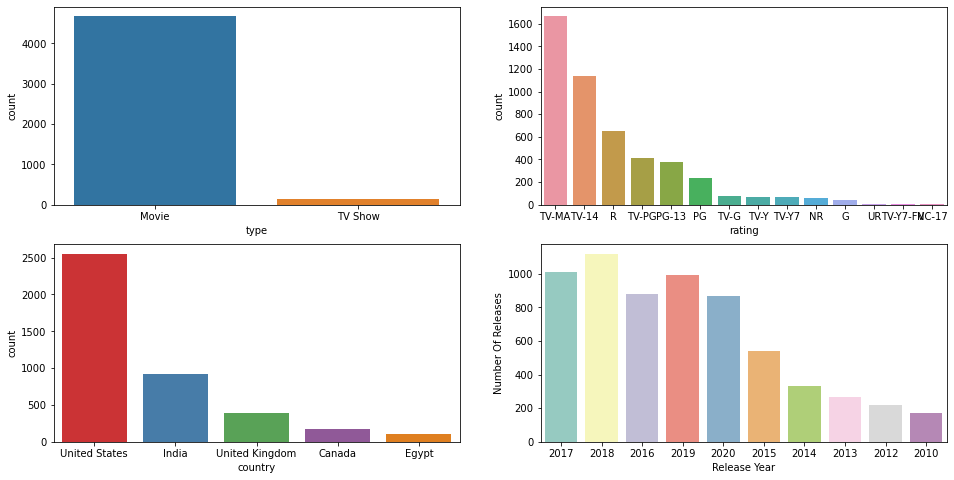

In [6]:
f, ax = plt.subplots(2,2,figsize=(16,8))
vis1 = sns.countplot(x=data["type"], ax= ax[0][0])
vis2 = sns.countplot(x=data["rating"], ax=ax[0][1], order=data['rating'].value_counts().index[0:15])
vis3 = sns.countplot(x=df['country'],ax=ax[1][0],palette = 'Set1', order=data['country'].value_counts().index[0:5])
plt.xlabel('Country')
plt.ylabel('Number Of Releases')
vis4= sns.countplot(x=df['release_year'], ax = ax[1][1] ,palette = 'Set3', order = data['release_year'].value_counts().index[0:10])
plt.xlabel('Release Year')
plt.ylabel('Number Of Releases')



<AxesSubplot:xlabel='count', ylabel='listed_in'>

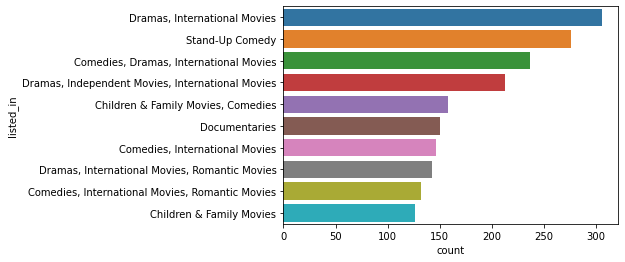

In [7]:
sns.countplot(y=data['listed_in'], order=data['listed_in'].value_counts().index[0:10])

<AxesSubplot:xlabel='duration', ylabel='count'>

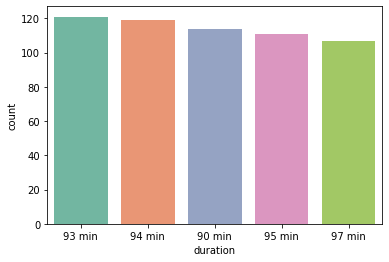

In [8]:
sns.countplot( x=data['duration'], palette = 'Set2', order = data['duration'].value_counts().index[0:5])

#### Based on these data visualizations we can find out some *fun stuff*
- **Movies are wayy more popular** than TV Shows 
- **TV for Mature Audiences** seems to be the most popular from the releases, interesting...
- USA, India, UK, Canada and Egypt seem to be the **most popular countries** for releases, GO BOLLYWOOD! 
- **2017 was a very popular year** for producers, but what's super interesting is that despite the Global Pandemic in 2020, it still managed to come 5th in most releases, so that's amazing! 
- **93 minutes seems** like the most popular duration, I guess people don't like longer movies/shows!
- **International Dramas** are the most popular genre!

In [9]:
features=['title','duration']
durations= data[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='purple')

<ipython-input-9-23db802b8fa0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
<ipython-input-9-23db802b8fa0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')


ValueError: invalid literal for int() with base 10: '93 min'

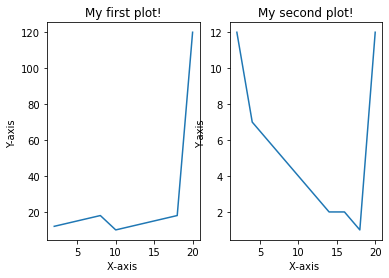

In [10]:
from matplotlib import pyplot as plt
import numpy as np

xPoints = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
y1Points = np.array([12, 14, 16, 18, 10, 12, 14, 16, 18, 120])
y2Points = np.array([12, 7, 6, 5, 4, 3, 2, 2, 1, 12])

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(xPoints, y1Points)
plt.title("My first plot!")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2) # index 2
plt.plot(xPoints, y2Points)
plt.title("My second plot!")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.show()


In [26]:
import plotly.graph_objects as go
india_movie_data=data[data['country']=='India'] [0:20]
india_movies=india_movie_data.sort_values(by='release_year')[0:20]
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='red'),
                 cells=dict(values=[india_movie_data['title'],india_movies['release_year']],fill_color='pink'))
                     ])
fig.show()